In [1]:
import pandas as pd
import seaborn as sns
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

[nltk_data] Downloading package wordnet to C:\Users\Dev Atul
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dev Atul
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Dev Atul
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df=pd.read_csv("C:\\Users\\Dev Atul Patel\\Downloads\\train.txt",delimiter=';',names=['text','label'])

In [4]:
df

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


<AxesSubplot: xlabel='label', ylabel='count'>

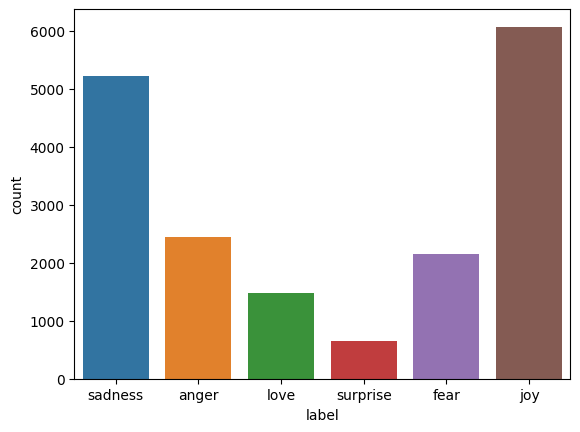

In [7]:
sns.countplot(x=df.label)

In [11]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
    return df
df.label=custom_encoder(df.label)

<AxesSubplot: xlabel='label', ylabel='count'>

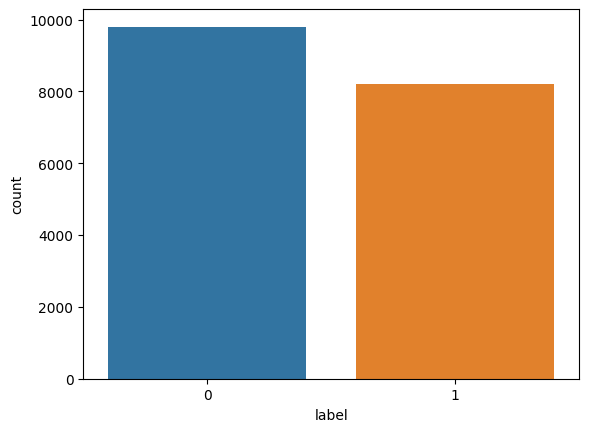

In [13]:
sns.countplot(x=df.label)

In [14]:
lm=WordNetLemmatizer()

In [15]:
stops=set(stopwords.words('english'))

In [22]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item)) 
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in stops]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [23]:
corpus=text_transformation(df.text)

In [24]:
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(corpus)
X=traindata
y=df.label

In [ ]:
rfc=RandomForestClassifier(min_samples_split=5, n_estimators=500)
rfc.fit(X,y)

In [26]:
test_df=pd.read_csv("C:\\Users\\Dev Atul Patel\\Downloads\\train.txt",delimiter=';',names=['text','label'])

In [ ]:
X_test,y_test = test_df.text,test_df.label
test_df = custom_encoder(y_test)
test_corpus = text_transformation(X_test)
testdata = cv.transform(test_corpus)
predictions = rfc.predict(testdata)

In [ ]:
acc_score=accuracy_score(y_test,predictions)
print('Accuracy_score:',acc_score)

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
else:
        print("Invalid Statement.")


In [ ]:
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [ ]:
input1=["worst player"]
input2=["good player"]
sentiment_predictor(input1)
sentiment_predictor(input2)